# Pathway Enrichment Analysis 
Using KEGG analysis to explore enriched pathways from DMGs identified in pairwise comparisons with HC (hypoxic control) 

#### load and prep data frames

In [2]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

In [3]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/HH_vs_HC.csv')


# All DMGs for pairwise comparisons
functional analysis for all genes in a pairwise comparison (not just focusing on significantly differentially methylated)

## control control vs. hypoxic control
CC vs. HC

In [4]:
head(CC_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,0.03029546,0.00000000,0.1191171,0,1,NA
2,LOC111126949,0.02329137,-0.01938737,0.1191171,0,1,NA
3,LOC111110729,0.24289891,-0.06519374,0.1262758,0,1,NA
4,LOC111112434,1.05673492,0.07479191,0.2831554,0,1,NA
5,LOC111120752,0.61675227,0.01438339,0.2812740,0,1,NA
6,LOC111128944,0.00000000,NA,NA,NA,NA,NA


formatting the df as needed to run KEGG

In [5]:
# selecting columns I need
cc_hc <- select(CC_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
cc_hc$X <- substr(cc_hc$X, start = 4, stop = nchar(cc_hc$X))

# renaming columns
colnames(cc_hc) <- c('gene', 'lfc', 'padj')

head(cc_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111116054,0.00000000,NA
2,111126949,-0.01938737,NA
3,111110729,-0.06519374,NA
4,111112434,0.07479191,NA
5,111120752,0.01438339,NA
6,111128944,NA,NA


In [6]:
# creating numeric vector for kegg object
CC_kegg_gene_list <- cc_hc$lfc # log fold change
names(CC_kegg_gene_list) <- cc_hc$gene

# omitting anything with NA in a cell
CC_kegg_gene_list <- na.omit(CC_kegg_gene_list)

# sort list in descending order by fold change
CC_kegg_gene_list = sort(CC_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CC_kegg_gene_list)
class(CC_kegg_gene_list)

111129122 111111609 111136327 111130929 111100699 111115479 
 1.830976  1.516282  1.389714  1.381054  1.375647  1.362274

[1] "numeric"

now that my gene list looks okay - running KEGG

In [7]:
kegg_organism = 'cvn'
CC_kk2 <- gseKEGG(geneList = CC_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (11.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [12]:
CC_kk2_df <- as.data.frame(CC_kk2)
CC_kk2_df$Description <- sub(" -.*", "", CC_kk2_df$Description)
head(CC_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,22,0.6928301,1.807250,0.001579554,0.2100807,0.2100807,4290,"tags=41%, list=17%, signal=34%",111113990/111115744/111103312/111136066/111107112/111127642/111136438/111115745/111124908
cvn04148,cvn04148,Efferocytosis,143,-0.4160657,-1.396467,0.007363476,0.4896712,0.4896712,4956,"tags=31%, list=20%, signal=25%",111104883/111123084/111133224/111131676/111135761/111135946/111126055/111120235/111112332/111107795/111108226/111121996/111128693/111130979/111134431/111124840/111100224/111125427/111127575/111112708/111124014/111127133/111126890/111130762/111113319/111136548/111113754/111107779/111136229/111118230/111100192/111131845/111137094/111133023/111125144/111118427/111128744/111113250/111122163/111110874/111134350/111115463/111135109/111109809/111123492
cvn00603,cvn00603,Glycosphingolipid biosynthesis,22,-0.6063912,-1.509368,0.036113893,0.7489260,0.7489260,1434,"tags=23%, list=6%, signal=21%",111131382/111125814/111125097/111131384/111119758
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,32,0.5099228,1.458245,0.037955397,0.7489260,0.7489260,4647,"tags=41%, list=19%, signal=33%",111113990/111115744/111129730/111136066/111107112/111131209/111122073/111119054/111136438/111115745/111119293/111124908/111122193
cvn04980,cvn04980,Cobalamin transport and metabolism,19,0.5519277,1.398519,0.099767981,0.7489260,0.7489260,6332,"tags=42%, list=26%, signal=31%",111126313/111130560/111122749/111111709/111113864/111111843/111118247/111107565
cvn00310,cvn00310,Lysine degradation,46,-0.4756211,-1.366749,0.069073783,0.7489260,0.7489260,2739,"tags=28%, list=11%, signal=25%",111112920/111121530/111131212/111130627/111115614/111137017/111130119/111122866/111130742/111125659/111107127/111110608/111128625


In [9]:
top10_CC <- head(CC_kk2_df[order(CC_kk2_df$pvalue), ], 10)
top10_CC

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,22,0.6928301,1.807250,0.001579554,0.2100807,0.2100807,4290,"tags=41%, list=17%, signal=34%",111113990/111115744/111103312/111136066/111107112/111127642/111136438/111115745/111124908
cvn04148,cvn04148,Efferocytosis,143,-0.4160657,-1.396467,0.007363476,0.4896712,0.4896712,4956,"tags=31%, list=20%, signal=25%",111104883/111123084/111133224/111131676/111135761/111135946/111126055/111120235/111112332/111107795/111108226/111121996/111128693/111130979/111134431/111124840/111100224/111125427/111127575/111112708/111124014/111127133/111126890/111130762/111113319/111136548/111113754/111107779/111136229/111118230/111100192/111131845/111137094/111133023/111125144/111118427/111128744/111113250/111122163/111110874/111134350/111115463/111135109/111109809/111123492
cvn00603,cvn00603,Glycosphingolipid biosynthesis,22,-0.6063912,-1.509368,0.036113893,0.7489260,0.7489260,1434,"tags=23%, list=6%, signal=21%",111131382/111125814/111125097/111131384/111119758
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,32,0.5099228,1.458245,0.037955397,0.7489260,0.7489260,4647,"tags=41%, list=19%, signal=33%",111113990/111115744/111129730/111136066/111107112/111131209/111122073/111119054/111136438/111115745/111119293/111124908/111122193
cvn03015,cvn03015,mRNA surveillance pathway,71,0.3879639,1.293714,0.040295991,0.7489260,0.7489260,4992,"tags=42%, list=20%, signal=34%",111116311/111130886/111127981/111128721/111132883/111136672/111122880/111133404/111130413/111129219/111110811/111126090/111111718/111129063/111136311/111135732/111138235/111138201/111135694/111103429/111114674/111130150/111108043/111128988/111118318/111135433/111130065/111134286/111121238/111101712
cvn00561,cvn00561,Glycerolipid metabolism,63,0.3978828,1.309088,0.051117980,0.7489260,0.7489260,3331,"tags=24%, list=14%, signal=21%",111121919/111131656/111109441/111104123/111115675/111124876/111137368/111130726/111100090/111109442/111130419/111130644/111131560/111103498/111131063
cvn00310,cvn00310,Lysine degradation,46,-0.4756211,-1.366749,0.069073783,0.7489260,0.7489260,2739,"tags=28%, list=11%, signal=25%",111112920/111121530/111131212/111130627/111115614/111137017/111130119/111122866/111130742/111125659/111107127/111110608/111128625
cvn00640,cvn00640,Propanoate metabolism,37,0.4640701,1.357465,0.072916667,0.7489260,0.7489260,3845,"tags=38%, list=16%, signal=32%",111119686/111119284/111105925/111136066/111107112/111109254/111101152/111121118/111104175/111100566/111136438/111129319/111115883/111105866
cvn04310,cvn04310,Wnt signaling pathway,96,0.3440985,1.213629,0.090032154,0.7489260,0.7489260,4867,"tags=29%, list=20%, signal=23%",111105834/111100874/111121723/111106534/111129877/111134629/111105510/111126610/111118497/111122907/111119203/111100808/111135231/111112989/111117044/111135208/111135857/111117024/111101169/111108661/111125644/111104770/111122527/111123211/111103593/111135167/111106049/111125073


In [10]:
select(top10_CC, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn00592,alpha-Linolenic acid metabolism,0.001579554,0.2100807
cvn04148,Efferocytosis,0.007363476,0.4896712
cvn00603,Glycosphingolipid biosynthesis,0.036113893,0.7489260
cvn01040,Biosynthesis of unsaturated fatty acids,0.037955397,0.7489260
cvn03015,mRNA surveillance pathway,0.040295991,0.7489260
cvn00561,Glycerolipid metabolism,0.051117980,0.7489260
cvn00310,Lysine degradation,0.069073783,0.7489260
cvn00640,Propanoate metabolism,0.072916667,0.7489260
cvn04310,Wnt signaling pathway,0.090032154,0.7489260


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [13]:
get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}


gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adjust)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6928301,0.2100807,CLASS ....,Lipid me....
cvn04148,cvn04148,Efferocytosis,-0.4160657,0.4896712,CLASS ....,Transpor....
cvn00603,cvn00603,Glycosphingolipid biosynthesis,-0.6063912,0.7489260,CLASS ....,Glycan b....
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5099228,0.7489260,CLASS ....,Lipid me....
cvn04980,cvn04980,Cobalamin transport and metabolism,0.5519277,0.7489260,CLASS ....,Digestiv....
cvn00310,cvn00310,Lysine degradation,-0.4756211,0.7489260,CLASS ....,Amino ac....


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6928301,0.2100807,Metabolism,Lipid metabolism
cvn04148,cvn04148,Efferocytosis,-0.4160657,0.4896712,Cellular Processes,Transport and catabolism
cvn00603,cvn00603,Glycosphingolipid biosynthesis,-0.6063912,0.7489260,Metabolism,Glycan biosynthesis and metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5099228,0.7489260,Metabolism,Lipid metabolism
cvn04980,cvn04980,Cobalamin transport and metabolism,0.5519277,0.7489260,Organismal Systems,Digestive system
cvn00310,cvn00310,Lysine degradation,-0.4756211,0.7489260,Metabolism,Amino acid metabolism


In [14]:
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adjust)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6928301,0.2100807,CLASS ....,Lipid me....
cvn04148,cvn04148,Efferocytosis,-0.4160657,0.4896712,CLASS ....,Transpor....
cvn00603,cvn00603,Glycosphingolipid biosynthesis,-0.6063912,0.7489260,CLASS ....,Glycan b....
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5099228,0.7489260,CLASS ....,Lipid me....
cvn04980,cvn04980,Cobalamin transport and metabolism,0.5519277,0.7489260,CLASS ....,Digestiv....
cvn00310,cvn00310,Lysine degradation,-0.4756211,0.7489260,CLASS ....,Amino ac....


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6928301,0.2100807,Metabolism,Lipid metabolism
cvn04148,cvn04148,Efferocytosis,-0.4160657,0.4896712,Cellular Processes,Transport and catabolism
cvn00603,cvn00603,Glycosphingolipid biosynthesis,-0.6063912,0.7489260,Metabolism,Glycan biosynthesis and metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5099228,0.7489260,Metabolism,Lipid metabolism
cvn04980,cvn04980,Cobalamin transport and metabolism,0.5519277,0.7489260,Organismal Systems,Digestive system
cvn00310,cvn00310,Lysine degradation,-0.4756211,0.7489260,Metabolism,Amino acid metabolism


In [15]:
CC_df <- df
head(CC_df)
write.csv(CC_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/KEGG_pathwaysv/KEGG_CC_HC.csv')

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6928301,0.2100807,Metabolism,Lipid metabolism
cvn04148,cvn04148,Efferocytosis,-0.4160657,0.4896712,Cellular Processes,Transport and catabolism
cvn00603,cvn00603,Glycosphingolipid biosynthesis,-0.6063912,0.7489260,Metabolism,Glycan biosynthesis and metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5099228,0.7489260,Metabolism,Lipid metabolism
cvn04980,cvn04980,Cobalamin transport and metabolism,0.5519277,0.7489260,Organismal Systems,Digestive system
cvn00310,cvn00310,Lysine degradation,-0.4756211,0.7489260,Metabolism,Amino acid metabolism


Warning message in file(file, ifelse(append, "a", "w")):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/KEGG_pathwaysv/KEGG_CC_HC.csv': No such file or directory”


ERROR: Error in file(file, ifelse(append, "a", "w")): cannot open the connection


In [10]:
CC_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

In [11]:
# making sure R see enrichment score as a number
CC_df$enrichmentScore <- as.numeric(CC_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CC_df$direction <- ifelse(CC_df$enrichmentScore<0, "CC", #neg ES = pathway for control
                              ifelse(CC_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CC_df)

X,x,enrichmentScore,direction
<lgl>,<lgl>,<dbl>,<lgl>


In [12]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CC_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Reds', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control control vs. hypoxic control",
      fill = "General Pathway")

ERROR while rich displaying an object: Error in `combine_vars()`:
! Faceting variables must have at least one value.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. pa

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

In [13]:
options(repr.plot.width=15, repr.plot.height=10)

CC_top10 <- head(CC_df[order(CC_df$p.adjust), ], 10)
CC_top10

ggplot(CC_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': argument 1 is not a vector


In [14]:
CC_top10$Description

ERROR: Error in eval(expr, envir, enclos): object 'CC_top10' not found


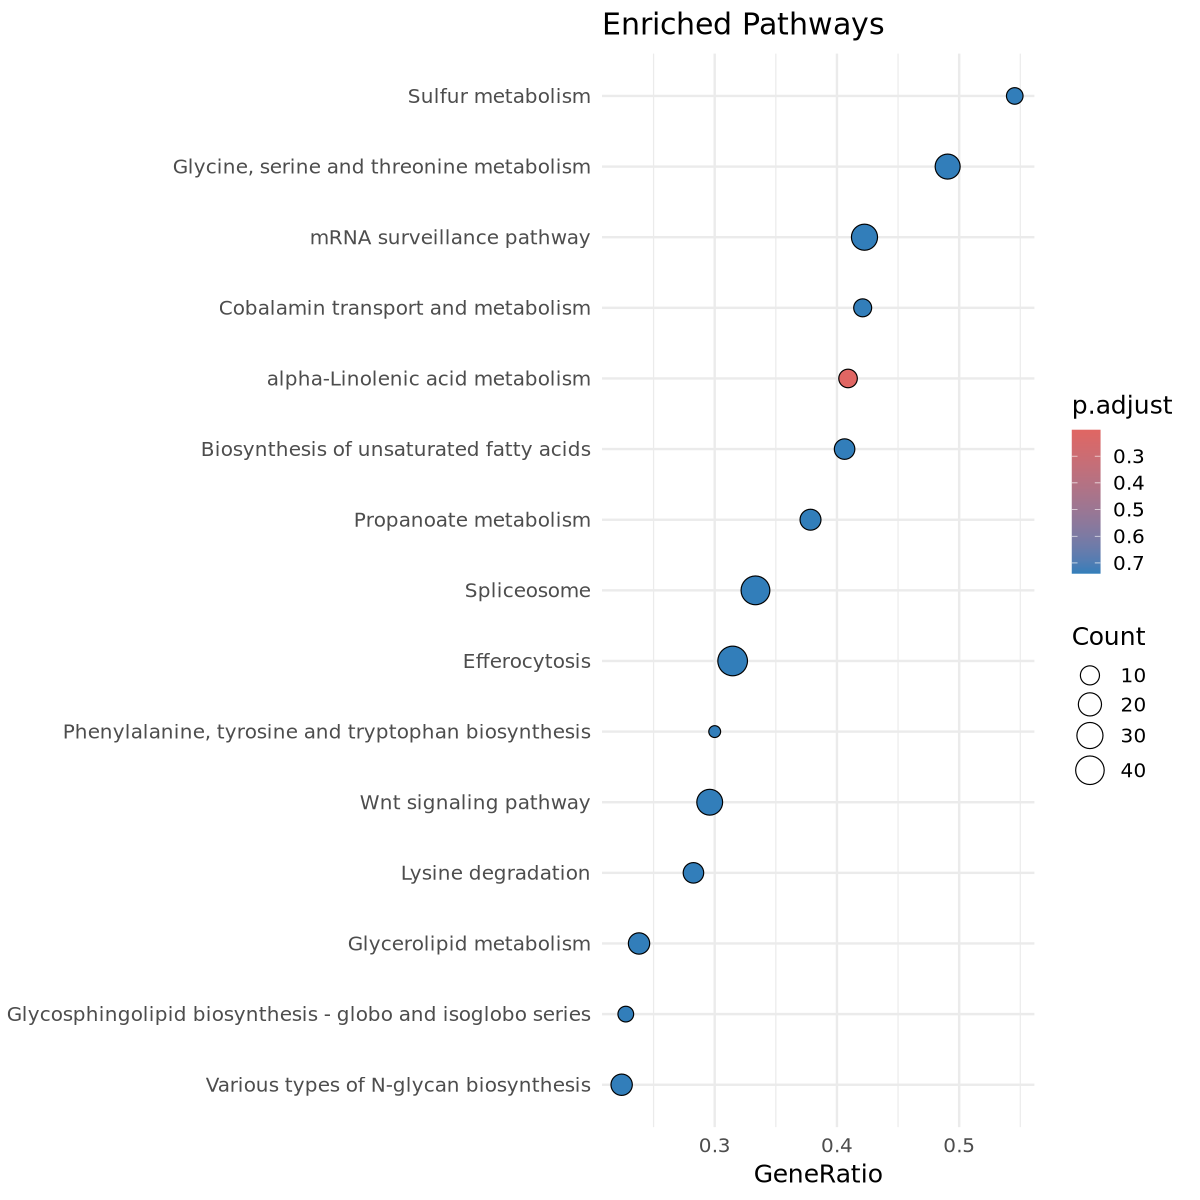

In [12]:
options(repr.plot.width=10, repr.plot.height=10)

CC_kk2@result$Description <- gsub(CC_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CC_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## control hypoxic vs. hypoxic control
CH vs. HC

In [13]:
head(CH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,0.03029546,0.00000000,0.1191171,0,1,NA
2,LOC111126949,0.02329137,-0.01768994,0.1191171,0,1,NA
3,LOC111110729,0.24289891,-0.06356103,0.1261820,0,1,NA
4,LOC111112434,1.05673492,0.11826212,0.2845709,0,1,NA
5,LOC111120752,0.61675227,0.20389041,0.2809352,0,1,NA
6,LOC111128944,0.00000000,NA,NA,NA,NA,NA


formatting the df as needed to run KEGG

In [14]:
# selecting columns I need
ch_hc <- select(CH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
ch_hc$X <- substr(ch_hc$X, start = 4, stop = nchar(ch_hc$X))

# renaming columns
colnames(ch_hc) <- c('gene', 'lfc', 'padj')

head(ch_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111116054,0.00000000,NA
2,111126949,-0.01768994,NA
3,111110729,-0.06356103,NA
4,111112434,0.11826212,NA
5,111120752,0.20389041,NA
6,111128944,NA,NA


In [15]:
# creating numeric vector for kegg object
CH_kegg_gene_list <- ch_hc$lfc
names(CH_kegg_gene_list) <- ch_hc$gene

# omitting anything with NA in a cell
CH_kegg_gene_list <- na.omit(CH_kegg_gene_list)

# sort list in descending order
CH_kegg_gene_list = sort(CH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CH_kegg_gene_list)
class(CH_kegg_gene_list)

111131529 111128942 111131170 111121672 111135891 111100915 
 1.860626  1.765463  1.731017  1.726340  1.694624  1.652907

[1] "numeric"

now that my gene list looks okay - running KEGG

In [16]:
kegg_organism = 'cvn'
CH_kk2 <- gseKEGG(geneList = CH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (10.55% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [17]:
CH_kk2_df <- as.data.frame(CH_kk2)
CH_kk2_df$Description <- sub(" -.*", "", CH_kk2_df$Description)
head(CH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,32,0.5732959,1.608429,0.010855327,0.7218793,0.7218793,2670,"tags=28%, list=11%, signal=25%",111129730/111136066/111136438/111134492/111131209/111122073/111119293/111107112/111119054
cvn04310,cvn04310,Wnt signaling pathway,98,0.4115187,1.414914,0.008421842,0.7218793,0.7218793,4865,"tags=37%, list=20%, signal=30%",111105834/111108661/111100808/111122907/111106534/111100874/111126610/111135167/111129877/111118497/111135231/111119203/111119669/111106049/111134629/111119924/111114913/111118435/111135857/111134796/111117024/111117044/111122527/111125073/111137105/111103593/111105510/111122108/111119736/111112989/111104770/111125433/111116519/111101169/111115059/111129084
cvn04122,cvn04122,Sulfur relay system,10,0.7413107,1.563023,0.029545731,0.8956104,0.8956104,582,"tags=30%, list=2%, signal=29%",111099660/111099625/111134884
cvn00920,cvn00920,Sulfur metabolism,11,0.6375183,1.378837,0.110599078,0.8956104,0.8956104,4418,"tags=55%, list=18%, signal=45%",111099152/111132495/111128712/111129350/111117314/111100638
cvn00400,cvn00400,"Phenylalanine, tyrosine and tryptophan biosynthesis",10,-0.6673188,-1.353707,0.101063830,0.8956104,0.8956104,7518,"tags=60%, list=31%, signal=42%",111135147/111108980/111105167/111134810/111103021/111137596
cvn00020,cvn00020,Citrate cycle (TCA cycle),39,-0.4900101,-1.347290,0.079159935,0.8956104,0.8956104,878,"tags=18%, list=4%, signal=17%",111101916/111136621/111131515/111134713/111131212/111100625/111129934


In [18]:
colnames(CH_kk2_df)

[1] "ID"              "Description"     "setSize"         "enrichmentScore"
 [5] "NES"             "pvalue"          "p.adjust"        "qvalue"         
 [9] "rank"            "leading_edge"    "core_enrichment"

looking for top 10 enriched pathways - by p-value (want to recorded unadjusted *and* adjusted p-value

In [19]:
top10_CH <- head(CH_kk2_df[order(CH_kk2_df$pvalue), ], 10)
top10_CH

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn04310,cvn04310,Wnt signaling pathway,98,0.4115187,1.414914,0.008421842,0.7218793,0.7218793,4865,"tags=37%, list=20%, signal=30%",111105834/111108661/111100808/111122907/111106534/111100874/111126610/111135167/111129877/111118497/111135231/111119203/111119669/111106049/111134629/111119924/111114913/111118435/111135857/111134796/111117024/111117044/111122527/111125073/111137105/111103593/111105510/111122108/111119736/111112989/111104770/111125433/111116519/111101169/111115059/111129084
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,32,0.5732959,1.608429,0.010855327,0.7218793,0.7218793,2670,"tags=28%, list=11%, signal=25%",111129730/111136066/111136438/111134492/111131209/111122073/111119293/111107112/111119054
cvn04122,cvn04122,Sulfur relay system,10,0.7413107,1.563023,0.029545731,0.8956104,0.8956104,582,"tags=30%, list=2%, signal=29%",111099660/111099625/111134884
cvn03015,cvn03015,mRNA surveillance pathway,71,0.3954881,1.289624,0.049717869,0.8956104,0.8956104,2913,"tags=27%, list=12%, signal=24%",111133404/111103422/111128988/111132883/111116311/111127981/111128721/111135732/111103429/111111718/111138201/111118318/111129219/111130886/111114674/111129063/111136549/111128922/111130150
cvn00330,cvn00330,Arginine and proline metabolism,75,-0.4411142,-1.342312,0.050874404,0.8956104,0.8956104,5102,"tags=40%, list=21%, signal=32%",111103445/111109369/111136020/111133872/111122379/111122529/111118061/111125396/111118058/111122381/111125850/111130979/111122380/111115614/111108373/111128087/111132780/111128753/111112920/111134508/111132445/111109392/111137751/111099180/111119088/111104425/111136221/111132935/111125537/111137596
cvn00561,cvn00561,Glycerolipid metabolism,63,0.4042700,1.294747,0.057068668,0.8956104,0.8956104,3167,"tags=24%, list=13%, signal=21%",111121919/111130419/111130644/111109442/111109441/111100090/111103498/111104123/111115675/111103451/111111356/111101391/111103330/111136657/111131560
cvn00020,cvn00020,Citrate cycle (TCA cycle),39,-0.4900101,-1.347290,0.079159935,0.8956104,0.8956104,878,"tags=18%, list=4%, signal=17%",111101916/111136621/111131515/111134713/111131212/111100625/111129934
cvn04620,cvn04620,Toll-like receptor signaling pathway,56,0.3948014,1.237625,0.092838196,0.8956104,0.8956104,2496,"tags=23%, list=10%, signal=21%",111100808/111127324/111107340/111135557/111135362/111125362/111130067/111104767/111130266/111107341/111108651/111120947/111118435
cvn00400,cvn00400,"Phenylalanine, tyrosine and tryptophan biosynthesis",10,-0.6673188,-1.353707,0.101063830,0.8956104,0.8956104,7518,"tags=60%, list=31%, signal=42%",111135147/111108980/111105167/111134810/111103021/111137596


In [20]:
select(top10_CH, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn04310,Wnt signaling pathway,0.008421842,0.7218793
cvn01040,Biosynthesis of unsaturated fatty acids,0.010855327,0.7218793
cvn04122,Sulfur relay system,0.029545731,0.8956104
cvn03015,mRNA surveillance pathway,0.049717869,0.8956104
cvn00330,Arginine and proline metabolism,0.050874404,0.8956104
cvn00561,Glycerolipid metabolism,0.057068668,0.8956104
cvn00020,Citrate cycle (TCA cycle),0.079159935,0.8956104
cvn04620,Toll-like receptor signaling pathway,0.092838196,0.8956104
cvn00400,"Phenylalanine, tyrosine and tryptophan biosynthesis",0.101063830,0.8956104


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

In [ ]:
gseKEGG_df <- select(CH_kk2_df, ID, Description, enrichmentScore, p.adj)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


In [21]:
CH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CH_HC.csv')

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CH_HC.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [ ]:
# making sure R see enrichment score as a number
CH_df$enrichmentScore <- as.numeric(CH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CH_df$direction <- ifelse(CH_df$enrichmentScore<0, "CH", #neg ES = pathway for control
                              ifelse(CH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CH_df)

In [ ]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Greens', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control hypoxic vs. hypoxic control",
      fill = "General Pathway")

In [ ]:
CH_top10$Description

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

CH_top10 <- head(CH_df[order(CH_df$p.adjust), ], 10)
CH_top10

ggplot(CH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

CH_kk2@result$Description <- gsub(CH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## hypoxic hypoxic vs. hypoxic control
HH vs. HC

In [22]:
head(HH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,0.03029546,0.023547556,0.1191171,0.0000000,1.0000000,NA
2,LOC111126949,0.02329137,-0.008575931,0.1191171,0.0000000,1.0000000,NA
3,LOC111110729,0.24289891,0.016854142,0.1262111,0.0000000,1.0000000,NA
4,LOC111112434,1.05673492,-0.446553473,0.2878041,-0.6829420,0.4946435,NA
5,LOC111120752,0.61675227,-0.332082994,0.2845998,-0.2884155,0.7730287,NA
6,LOC111128944,0.00000000,NA,NA,NA,NA,NA


formatting the df as needed to run KEGG

In [23]:
# selecting columns I need
hh_hc <- select(HH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
hh_hc$X <- substr(hh_hc$X, start = 4, stop = nchar(hh_hc$X))

# renaming columns
colnames(hh_hc) <- c('gene', 'lfc', 'padj')

head(hh_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111116054,0.023547556,NA
2,111126949,-0.008575931,NA
3,111110729,0.016854142,NA
4,111112434,-0.446553473,NA
5,111120752,-0.332082994,NA
6,111128944,NA,NA


In [24]:
# creating numeric vector for kegg object
HH_kegg_gene_list <- hh_hc$lfc
names(HH_kegg_gene_list) <- hh_hc$gene

# omitting anything with NA in a cell
HH_kegg_gene_list <- na.omit(HH_kegg_gene_list)

# sort list in descending order
HH_kegg_gene_list = sort(HH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(HH_kegg_gene_list)
class(HH_kegg_gene_list)

111118657 111108235 111119327 111133438 111112560 111119407 
 2.192114  2.169172  2.084902  1.949220  1.945492  1.943912

[1] "numeric"

now that my gene list looks okay - running KEGG

In [25]:
kegg_organism = 'cvn'
HH_kk2 <- gseKEGG(geneList = HH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (10.94% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [26]:
HH_kk2_df <- as.data.frame(HH_kk2)
HH_kk2_df$Description <- sub(" -.*", "", HH_kk2_df$Description)
head(HH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,55,0.5399651,1.567458,0.003380216,0.4495687,0.4447653,1747,"tags=22%, list=7%, signal=20%",111135192/111137596/111129934/111122141/111122163/111136621/111110831/111100699/111133693/111106176/111102594/111111318
cvn00592,cvn00592,alpha-Linolenic acid metabolism,22,-0.6569109,-1.718894,0.008570475,0.5241541,0.5185537,3407,"tags=45%, list=14%, signal=39%",111115085/111135554/111121119/111115745/111103312/111124908/111136438/111107112/111103240/111113990
cvn00563,cvn00563,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,37,0.5648350,1.544834,0.012550248,0.5241541,0.5185537,3720,"tags=32%, list=15%, signal=28%",111120568/111118285/111121275/111133439/111137394/111136211/111136158/111137980/111129796/111118609/111132406/111125613
cvn00591,cvn00591,Linoleic acid metabolism,31,-0.5446575,-1.497853,0.015764033,0.5241541,0.5185537,3134,"tags=23%, list=13%, signal=20%",111135554/111121119/111103312/111121956/111103240/111127589/111127588
cvn04980,cvn04980,Cobalamin transport and metabolism,19,-0.6147586,-1.551765,0.021493457,0.5613657,0.5553678,1731,"tags=26%, list=7%, signal=24%",111122749/111111843/111115300/111126313/111130560
cvn00350,cvn00350,Tyrosine metabolism,30,0.5516315,1.454327,0.033766360,0.5613657,0.5553678,5112,"tags=27%, list=21%, signal=21%",111137596/111102674/111100724/111128087/111100973/111133619/111129960/111135147


In [27]:
top10_HH <- head(HH_kk2_df[order(HH_kk2_df$pvalue), ], 10)
top10_HH

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,55,0.5399651,1.567458,0.003380216,0.4495687,0.4447653,1747,"tags=22%, list=7%, signal=20%",111135192/111137596/111129934/111122141/111122163/111136621/111110831/111100699/111133693/111106176/111102594/111111318
cvn00592,cvn00592,alpha-Linolenic acid metabolism,22,-0.6569109,-1.718894,0.008570475,0.5241541,0.5185537,3407,"tags=45%, list=14%, signal=39%",111115085/111135554/111121119/111115745/111103312/111124908/111136438/111107112/111103240/111113990
cvn00563,cvn00563,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,37,0.5648350,1.544834,0.012550248,0.5241541,0.5185537,3720,"tags=32%, list=15%, signal=28%",111120568/111118285/111121275/111133439/111137394/111136211/111136158/111137980/111129796/111118609/111132406/111125613
cvn00591,cvn00591,Linoleic acid metabolism,31,-0.5446575,-1.497853,0.015764033,0.5241541,0.5185537,3134,"tags=23%, list=13%, signal=20%",111135554/111121119/111103312/111121956/111103240/111127589/111127588
cvn04980,cvn04980,Cobalamin transport and metabolism,19,-0.6147586,-1.551765,0.021493457,0.5613657,0.5553678,1731,"tags=26%, list=7%, signal=24%",111122749/111111843/111115300/111126313/111130560
cvn03082,cvn03082,ATP-dependent chromatin remodeling,98,-0.3892932,-1.332454,0.027859554,0.5613657,0.5553678,4352,"tags=29%, list=18%, signal=24%",111130875/111118535/111121077/111132974/111114820/111130322/111117803/111120915/111135329/111114842/111105716/111136148/111125973/111134187/111128754/111118359/111129852/111128560/111130152/111123841/111127973/111108477/111127274/111120594/111120856/111114783/111105834/111133731
cvn00260,cvn00260,"Glycine, serine and threonine metabolism",53,0.4832473,1.395923,0.030117555,0.5613657,0.5553678,6571,"tags=53%, list=27%, signal=39%",111128625/111122141/111125218/111137062/111130119/111102594/111111318/111137347/111100724/111128087/111116065/111118059/111106392/111108560/111122380/111109454/111122379/111120495/111137345/111131063/111100351/111109254/111118058/111135916/111114474/111122125/111119739/111119088
cvn00350,cvn00350,Tyrosine metabolism,30,0.5516315,1.454327,0.033766360,0.5613657,0.5553678,5112,"tags=27%, list=21%, signal=21%",111137596/111102674/111100724/111128087/111100973/111133619/111129960/111135147
cvn04122,cvn04122,Sulfur relay system,10,-0.6982085,-1.474675,0.050902008,0.7522186,0.7441814,2031,"tags=50%, list=8%, signal=46%",111134884/111136090/111130526/111099625/111099660


In [28]:
select(top10_HH, Description, pvalue, p.adjust)

,Description,pvalue,p.adjust
,<chr>,<dbl>,<dbl>
cvn00270,Cysteine and methionine metabolism,0.003380216,0.4495687
cvn00592,alpha-Linolenic acid metabolism,0.008570475,0.5241541
cvn00563,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,0.012550248,0.5241541
cvn00591,Linoleic acid metabolism,0.015764033,0.5241541
cvn04980,Cobalamin transport and metabolism,0.021493457,0.5613657
cvn03082,ATP-dependent chromatin remodeling,0.027859554,0.5613657
cvn00260,"Glycine, serine and threonine metabolism",0.030117555,0.5613657
cvn00350,Tyrosine metabolism,0.033766360,0.5613657
cvn04122,Sulfur relay system,0.050902008,0.7522186


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(HH_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [29]:
HH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_HH_HC.csv')

Warning message in file(file, "rt"):
“cannot open file '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_HH_HC.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


okay so all of these KEGG bar plots are the exact same - since my input for all of them contain the same genes, just different LFC numbers, this makes sense - i'm not telling it to look at which pair has more enrichment of a pathway - but I'm not sure that I can correctly do that anyway, since methylation data doesn't necessarily tell us a direction - just that there are more differentially methylated geenes in a certain direction (but we don't know if that's 'good'/'bad', something becoming unmethylated is just as important as becoming more methylated) - DESeq only tells me that there were changes, not that there was for sure more methylation in one treatment (CC could become unmethylated, which would show up as more methylation for HC) ... things to think about with this analysis

In [ ]:
# making sure R see enrichment score as a number
HH_df$enrichmentScore <- as.numeric(HH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
HH_df$direction <- ifelse(HH_df$enrichmentScore<0, "HH", #neg ES = pathway for control
                              ifelse(HH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(HH_df)

In [ ]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= HH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Purples', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "hypoxic hypoxic vs. hypoxic control",
      fill = "General Pathway")

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

In [ ]:
options(repr.plot.width=15, repr.plot.height=10)

HH_top10 <- head(HH_df[order(HH_df$p.adjust), ], 10)
HH_top10

ggplot(HH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

In [ ]:
HH_top10$Description

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

HH_kk2@result$Description <- gsub(HH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(HH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## significantly differentially methylated genes

In [30]:
sig_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_CC_HC_genes.csv')
sig_HH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_HH_HC_genes.csv')
sig_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/geneFeatures_res/sig_DMGs/sig_CH_HC_genes.csv')

### control control vs. hypoxic control *sig. DMG*

In [31]:
head(sig_CC)

,X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,LOC111103344,497.52024,-1.193080,0.2105031,-4.480123,7.460015e-06,0.01869231,"uncharacterized LOC111103344, transcript variant X7"
2,2,LOC111115023,20.27520,-1.349383,0.2740700,-4.011321,6.038007e-05,0.04126154,uncharacterized LOC111115023
3,3,LOC111117745,123.41704,-1.135814,0.2070067,-4.279157,1.876021e-05,0.02350342,"uncharacterized LOC111117745, transcript variant X5"
4,4,LOC111117760,138.87250,-1.494878,0.2901102,-4.291052,1.778290e-05,0.02350342,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
5,5,LOC111118022,19.27594,-1.664142,0.3486511,-4.056038,4.991215e-05,0.03751897,"exocyst complex component 7-like, transcript variant X1"
6,6,LOC111119327,13.31739,-1.507178,0.3154716,-3.985075,6.745881e-05,0.04225732,"calcyphosin-like protein, transcript variant X3"


In [32]:
sig_CC$symbol <- substr(sig_CC$symbol, start = 4, stop = nchar(sig_CC$symbol))

# creating numeric vector for kegg object
CCgene_list <- sig_CC$log2FC
names(CCgene_list) <- sig_CC$symbol

# omitting anything with NA in a cell
CCgene_list <- na.omit(CCgene_list)

# sort list in descending order
CCgene_list = sort(CCgene_list, decreasing = TRUE)

# checking that things look okay
head(CCgene_list)
class(CCgene_list)

111129146  111133874  111117745  111103344  111123492  111115023 
 1.3427188 -0.9820156 -1.1358142 -1.1930798 -1.2645908 -1.3493827

[1] "numeric"

In [38]:
# Significant genes
kegg_organism = 'cvn'
cc_gsea <- gsea(geneList = CCgene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH' #Benjamini-Hockberg FDR
                )

ERROR: Error in gsea(geneList = CCgene_list, organism = kegg_organism, pvalueCutoff = 1, : could not find function "gsea"
